In [2]:
import numpy
import scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import numpy.random as nprnd
import random
import json
from numpy import *


# Introduction


In this homework, you'll be required to load in a dataset which has about 500 features. By using
Lasso ($L^1$) regression, we'll find the optimal constraint on the $L^1$ norm which gives us the best
$R^2$. Then we'll plot the results.

Recall we minimize the following on ** training data: $(x_i,y_i)$**

$$\min_{\beta} \frac{1}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i)^2 + \lambda \|\beta \|_{L^1}.$$


Denoting $\beta_{\lambda}$ as the minimum of the above, we then choose $\lambda$ to maximize $R^2$ on **testing data: $(x_j,y_j)$**

$$ \max_{\lambda} 1 - \frac{\sum_{j} (y_j - \beta_{\lambda} \cdot x_j)^2}{\sum_j (y_j - \bar y)^2}$$


# Lasso Regularization

## Problem 1

a) Load in hw2data.csv from ../data into a pandas dataframe.

b) Set y to be the y variable in the dataframe from a and X to be the remaining features.

c) As shown in the Booking.com example, using Lasso regression, find the regularization strength
which optimizes the $R^2$. 

**Hint:** Take a range of alpha from `np.logspace(-8,-3,1000)`

d) Plot the training performance versus the testing performance, and observe where the test performance is
maximized. I've written an outline of the code you need.

In [3]:
data = genfromtxt("data/hw2data.csv", delimiter=",")

y=data[:,500]

X=data[:,0:500]

print "test"

for i in range(0,len(X)):
    for k in range(0,len(X[:,0])):
        if numpy.isinf(X[i,k]) == True:
            X[i,k] = 0
            print X[i,k]
        if numpy.isnan(X[i,k]) == True:
            X[i,k] = 0
            print X[i,k]
                       
for i in range(0,len(y)):
    if numpy.isnan(y[i]) == True:
        y[i] = 0           

X = (X - numpy.mean(X))/numpy.std(X) 
print numpy.std(X)
size=len(X)
size1=len(y)
X_train= X[0:int(size*.8),0:500]
X_test = X[int(size*.8):,0:500]
y_train = y[0:int(size1*.8)]
y_test = y[int(size1*.8):]

alphas = numpy.logspace(-8,-3,1000)
from sklearn.linear_model import Lasso
scores = []
for alpha in alphas:
    regr = Lasso(alpha=alpha)
    regr.fit(X_train,y_train)
    scores.append(regr.score(X_test,y_test))
   


test
1.0


C:\Users\Saumya\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


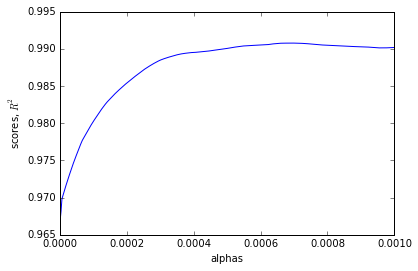

In [12]:
plt.plot(alphas, scores)
plt.xlabel('alphas')
plt.ylabel('scores, $R^2$')
plt.show()

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



a = max(scores)
print a
ind_scores=numpy.where(scores==a)
ind_alpha = alphas[ind_scores]
print ind_alpha
# Fill these in
alphas = numpy.logspace(-8,-3,1000)
train_errors=[]
test_errors=[]
alpha_optim= ind_alpha

for alpha in alphas:
    regr = Lasso(alpha=alpha)
    regr.fit(X_train,y_train)
    a1=numpy.mean((regr.predict(X_train)-y_train)**2)
    b1=numpy.mean((regr.predict(X_test)-y_test)**2)
    train_errors.append(a1)
    test_errors.append(b1)


0.99076917281
[ 0.00069158]


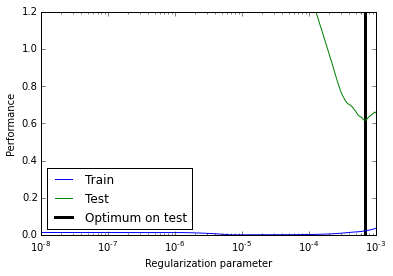

In [6]:
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k', linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')


plt.show()

e) Plot the top coefficients based on this optimal paramter. Why do you think so many are zero? 

So many are zero because the slope is zero between those variables and y.  So there is no relationship between the dependent variable and independent variable.

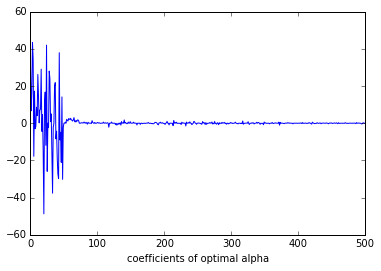

In [7]:
regr = Lasso(alpha=ind_alpha)
regr.fit(X_train,y_train)
plt.plot(regr.coef_)
plt.xlabel('coefficients of optimal alpha')
plt.ylabel('')
plt.show()


f) Compute the $R^2$ with the optimal coefficient found above on 5 folds using cross_val_score and plot the
results. Does the model work well on all random subsets?

The model works well with $R^2$ close to 1.0 most of the time but there are instances when the score is less than -1.0.

g) Repeat e) but using cross validation. Use error bars on the features which are the standard deviation of the 
coefficienst obtained above. For this problem I"ll walk you through the code. You just need to apply your optimal
$\alpha$ found above. 

In [20]:
from sklearn.cross_validation import KFold
from sklearn import preprocessing
def run_cv_coeffs(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    scores_cv=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
        scores_cv.append(clf.score(X_test,y_test))
    return coeffs, scores_cv


data = genfromtxt("data/hw2data.csv", delimiter=",")

y=data[:,500]

X=data[:,0:500]
      
for i in range(0,len(y)):
    if numpy.isnan(y[i]) == True:
        y[i] = 0 

scaler = preprocessing.StandardScaler()
#X_scaled = X.as_matrix().astype(np.float)
X_scaled = scaler.fit_transform(X)
alpha_best = alpha_optim
coeffs, scores_cv=run_cv_coeffs(X_scaled,np.array(y),Lasso,alpha=alpha_best)



[0.98261347616697037, -2.3623510629352333, 0.98006264113961528, 0.97990702786691153, 0.98518386860295615]


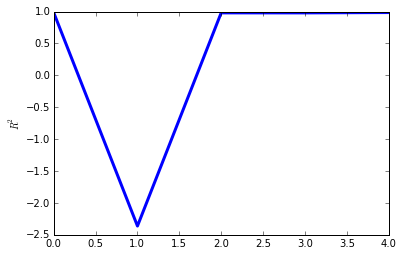

In [21]:
print (scores_cv)
plt.plot(scores_cv,linewidth=3)
plt.ylabel('$R^2$')
plt.show()


In [10]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(X))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(X))]
    return coeffs_avgd, coeffs_std

coeffs_avg,coeffs_std=get_coeffs(coeffs)

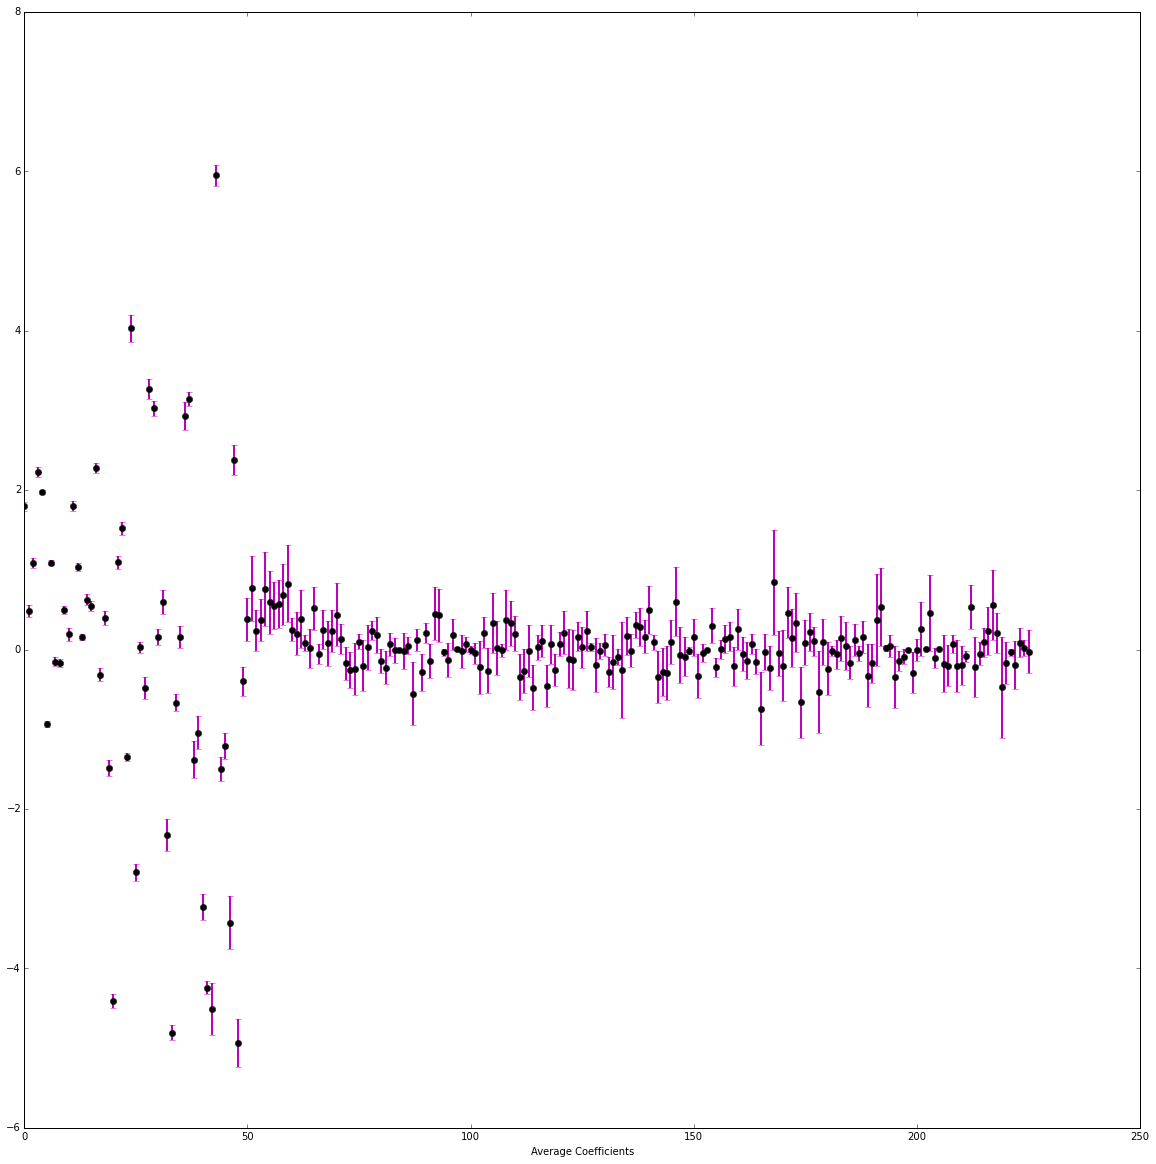

In [11]:

x = numpy.arange(len(coeffs_avg))
plt.figure(figsize=(20,20))
plt.errorbar(x,coeffs_avg,yerr=coeffs_std,fmt='ko', ecolor='m',linewidth=2)
plt.xlabel('Average Coefficients')
plt.show()